<a href="https://colab.research.google.com/github/nourelfaramawy/Histogram-Modifications/blob/main/Histogram_Modifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.4639893639848935
(26, 202)


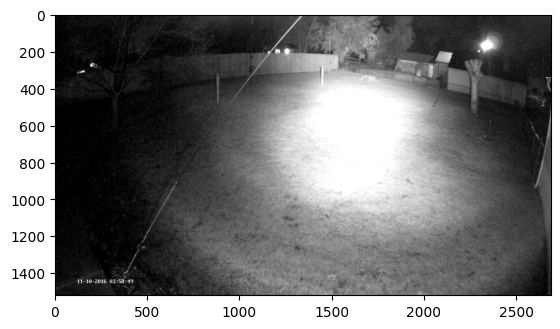

In [1]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt



def CalculateCooccurrence(imagearray):
  co_occurrence_matrix = np.zeros((256, 256), dtype=int)
  for i in range(imgarray.shape[0] - 1):  # Rows
      for j in range(imgarray.shape[1]):  # Columns
          current_intensity = imgarray[i, j]
          south_intensity = imgarray[i + 1, j]
          co_occurrence_matrix[current_intensity, south_intensity] += 1
  return co_occurrence_matrix





def CalculateContrast(co_occurrence_matrix):
  contrast = 0;
  for i in range(256):
      for j in range(256):
          if co_occurrence_matrix[i, j] > 0:
              contrast += (co_occurrence_matrix[i, j] * abs(i - j))

  denominator_sum = sum(abs(i - j) for i in range(256) for j in range(256))

  if denominator_sum == 0:
      contrast = 0.0
  else:
      contrast /= denominator_sum

  return contrast


def CalculateHistogram(imagearray):
  histoMatrix = np.zeros((256), dtype=int)
  for i in range(imagearray.shape[0]):  # Rows
      for j in range(imagearray.shape[1]):  # Columns
          pixel_value = imagearray[i, j]
          histoMatrix[pixel_value] += 1
  return histoMatrix


def CalculateCumulativeHistogram(histoMatrix):
  accHistoMatrix = np.zeros((256), dtype=int)
  for i in range(histoMatrix.size):
      if i==0:
        accHistoMatrix[i] = histoMatrix[0]
      else:
        accHistoMatrix[i] = histoMatrix[i]+accHistoMatrix[i-1]
  return accHistoMatrix


def GetColorAtPersentage(inputPercentage,accumulativeHistogram):
  remainingPercentage = 100 - inputPercentage
  sameAsInput = 0
  sameAsOutput = 0

  for i in range(accumulativeHistogram.size):
    pixelPercantage = int((accumulativeHistogram[i]/accumulativeHistogram[255]) * 100 )
    if pixelPercantage == inputPercentage:
      sameAsInput = i
    elif pixelPercantage == remainingPercentage:
      sameAsOutput = i

      return sameAsInput, sameAsOutput


def StretchContrast(imagearray, a, b, c, d):
    scalingFactor = (b - a) / (d - c)
    for i in range(imagearray.shape[0]):  # Rows
        for j in range(imagearray.shape[1]):  # Columns
            if (imagearray[i, j] - c) < 0:
              imagearray[i, j] = a
            elif (int(((imagearray[i, j] - c) * scalingFactor) + a)>254) :
              imagearray[i, j] = b
            else:
              imagearray[i, j] = int(((imagearray[i, j] - c) * scalingFactor) + a)


    return imagearray


def EqualizeHistogram(imagearray, a, b):
  imghisto = CalculateHistogram(imagearray)
  accHistoArray = CalculateCumulativeHistogram(imghisto)
  for i in range(imagearray.shape[0]):  # Rows
        for j in range(imagearray.shape[1]):  # Columns
           fMin = accHistoArray[a]
           f = imagearray[i,j]
           if int((accHistoArray[f] - fMin) * (255/(accHistoArray[b]-fMin))) <0:
              imagearray[i, j] = 0
           elif int((accHistoArray[f] - fMin) * (255/(accHistoArray[b]-fMin))) >254 :
              imagearray[i, j] = 255
           else :
              imagearray[i,j] = int((accHistoArray[f] - fMin) * (255/(accHistoArray[b]-fMin)))

  return imagearray


def GrayscaleTransformation(imagearray, x1, y1, x2, y2):
  for i in range(imagearray.shape[0]):  # Rows
        for j in range(imagearray.shape[1]):  # Columns
           p = imagearray[i,j]
           if p < x1:
              imagearray[i,j] = int(p * (y1/x1))
           elif x1 <= p < x2:
              imagearray[i,j] = int(((p - x1) * ((y2 - y1)/(x2 - x1))) + y1)
           else:
              imagearray[i,j] = int(((p - x2) * ((255 - y2)/(255 - x2))) + y2)

  return imagearray

img = Image.open('image.png').convert("L")

imgarray = np.array(img)
#print(imgarray)
#plt.imshow(img)
coco =  CalculateCooccurrence(imgarray)
contrast = CalculateContrast(coco)
print(contrast)
histo= CalculateHistogram(imgarray)
accHistoMatrix = CalculateCumulativeHistogram(histo)
#print(accHistoMatrix)
colorPercentage = GetColorAtPersentage(5,accHistoMatrix)
print(colorPercentage)
stretchedArray = StretchContrast(imgarray, 0, 255, colorPercentage[0], colorPercentage[1])
stretchedImage = Image.fromarray(stretchedArray, mode="L")
plt.imshow(stretchedImage, cmap="gray")

# equalizedArray = EqualizeHistogram(imgarray, colorPercentage[0], colorPercentage[1])
# equalizedImage = Image.fromarray(equalizedArray, mode="L")
# plt.imshow(equalizedImage, cmap="gray")
#plt.plot(accHistoMatrix)
# modhisto = CalculateHistogram(stretchedArray)
# modcumhisto = CalculateCumulativeHistogram(modhisto)
# plt.plot(modcumhisto)




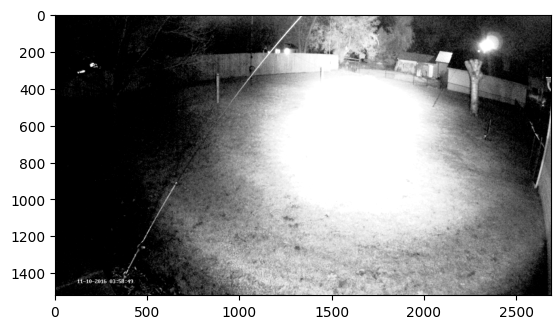

In [2]:
equalizedArray = EqualizeHistogram(imgarray, colorPercentage[0], colorPercentage[1])
equalizedImage = Image.fromarray(equalizedArray, mode="L")
plt.imshow(equalizedImage, cmap="gray")
#plt.plot(accHistoMatrix)
# modhisto = CalculateHistogram(stretchedArray)
# modcumhisto = CalculateCumulativeHistogram(modhisto)
# plt.plot(modcumhisto)

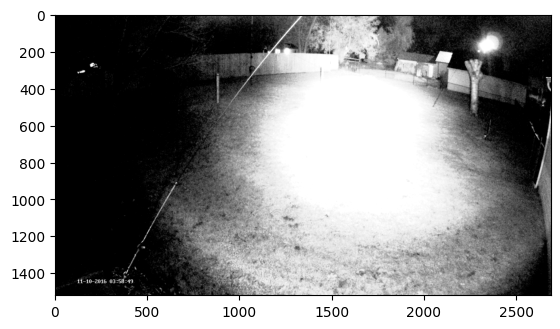

In [3]:
grayArray = GrayscaleTransformation(imgarray, colorPercentage[0], 5,colorPercentage[1], 220)
grayImage = Image.fromarray(grayArray, mode="L")
plt.imshow(grayImage, cmap="gray")

(25, 199)


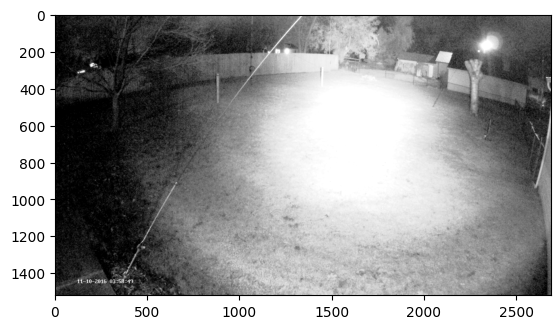

In [4]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = Image.open('image.png').convert("L")
imgarray = np.array(img)


def CalculateHistogram(imagearray):
  histoMatrix = np.zeros((256), dtype=int)
  for i in range(imagearray.shape[0]):  # Rows
      for j in range(imagearray.shape[1]):  # Columns
          pixel_value = imagearray[i, j]
          histoMatrix[pixel_value] += 1
  return histoMatrix


def CalculateCumulativeHistogram(histoMatrix):
  accHistoMatrix = np.zeros((256), dtype=int)
  for i in range(histoMatrix.size):
      if i==0:
        accHistoMatrix[i] = histoMatrix[0]
      else:
        accHistoMatrix[i] = histoMatrix[i]+accHistoMatrix[i-1]
  return accHistoMatrix

def GetColorAtPersentage(inputPercentage,accumulativeHistogram):
  remainingPercentage = 100 - inputPercentage
  sameAsInput = 0
  sameAsOutput = 0

  for i in range(accumulativeHistogram.size):
    pixelPercantage = round ((accumulativeHistogram[i]/accumulativeHistogram[255]) * 100 )
    if pixelPercantage == inputPercentage:
      sameAsInput = i
    elif pixelPercantage == remainingPercentage:
      sameAsOutput = i

      return sameAsInput, sameAsOutput

def EqualizeHistogram(imagearray, a, b):
  imghisto = CalculateHistogram(imagearray)
  accHistoArray = CalculateCumulativeHistogram(imghisto)
  for i in range(imagearray.shape[0]):  # Rows
        for j in range(imagearray.shape[1]):  # Columns
           fMin = accHistoArray[a]
           f = imagearray[i,j]
           if int((accHistoArray[f] - fMin) * (255/(accHistoArray[b]-fMin))) <0:
              imagearray[i, j] = 0
           elif int((accHistoArray[f] - fMin) * (255/(accHistoArray[b]-fMin))) >254 :
              imagearray[i, j] = 255
           else :
              imagearray[i,j] = int((accHistoArray[f] - fMin) * (255/(accHistoArray[b]-fMin)))

  return imagearray
histo= CalculateHistogram(imgarray)
accHistoMatrix = CalculateCumulativeHistogram(histo)
colorPercentage = GetColorAtPersentage(5,accHistoMatrix)
print(colorPercentage)
equalizedArray = EqualizeHistogram(imgarray, colorPercentage[0], colorPercentage[1])
equalizedImage = Image.fromarray(equalizedArray, mode="L")
plt.imshow(equalizedImage, cmap="gray")

[     19      32      43      71     115     194     365     365     618
    1058    1733    2884    4811    7904    7904   12476   19292   28654
   41022   57459   77983   77983  103029  132315  165718  203109  243800
  287737  287737  334387  383182  433387  484465  536649  588149  588149
  640456  692224  743955  795170  846918  898715  898715  949628  999684
 1048880 1096860 1144526 1191206 1191206 1236977 1282726 1327787 1371908
 1415362 1457405 1457405 1498289 1536920 1574144 1609767 1644115 1677722
 1677722 1710440 1742548 1773583 1804613 1834993 1865009 1865009 1894929
 1924710 1953845 1982649 2011282 2040236 2040236 2069429 2098413 2127963
 2158461 2189519 2220867 2220867 2251877 2283207 2314610 2345958 2376457
 2406902 2437073 2437073 2466631 2496098 2525343 2554466 2583590 2612710
 2612710 2642288 2670972 2699879 2729253 2758245 2787425 2787425 2817429
 2847419 2877498 2907833 2938420 2968602 2968602 2999031 3028940 3058092
 3086507 3114487 3141269 3141269 3166601 3190310 32

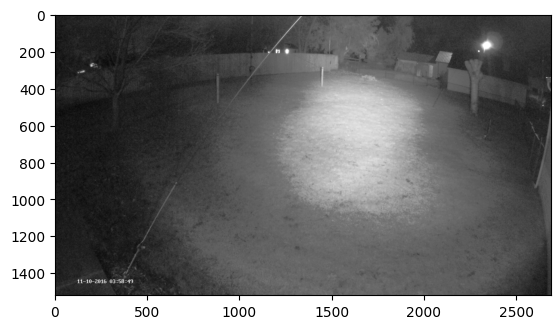

In [5]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt



def CalculateCooccurrence(imagearray):
  co_occurrence_matrix = np.zeros((256, 256), dtype=int)
  for i in range(imgarray.shape[0] - 1):  # Rows
      for j in range(imgarray.shape[1]):  # Columns
          current_intensity = imgarray[i, j]
          south_intensity = imgarray[i + 1, j]
          co_occurrence_matrix[current_intensity, south_intensity] += 1
  return co_occurrence_matrix



def CalculateContrast(co_occurrence_matrix):
  contrast = 0;
  for i in range(256):
      for j in range(256):
          if co_occurrence_matrix[i, j] > 0:
              contrast += (co_occurrence_matrix[i, j] * abs(i - j))

  denominator_sum = sum(abs(i - j) for i in range(256) for j in range(256))

  if denominator_sum == 0:
      contrast = 0.0
  else:
      contrast /= denominator_sum

  return contrast

def GrayscaleTransformation(imagearray, x1, y1, x2, y2):
  for i in range(imagearray.shape[0]):  # Rows
        for j in range(imagearray.shape[1]):  # Columns
           p = imagearray[i,j]
           if p < x1:
              imagearray[i,j] = int(p * (y1/x1))
           elif x1 <= p < x2:
              imagearray[i,j] = int(((p - x1) * ((y2 - y1)/(x2 - x1))) + y1)
           else:
              imagearray[i,j] = int(((p - x2) * ((255 - y2)/(255 - x2))) + y2)

  return imagearray
coco =  CalculateCooccurrence(imgarray)
contrast = CalculateContrast(coco)

img = Image.open('image.png').convert("L")

imgarray = np.array(img)
#print(imgarray)
#plt.imshow(img)
coco =  CalculateCooccurrence(imgarray)
contrast = CalculateContrast(coco)
#print(contrast)
histo= CalculateHistogram(imgarray)
accHistoMatrix = CalculateCumulativeHistogram(histo)
print(accHistoMatrix)
colorPercentage = GetColorAtPersentage(10,accHistoMatrix)
#print(colorPercentage)
grayArray = GrayscaleTransformation(imgarray, 88, 90,151, 120)
grayImage = Image.fromarray(grayArray, mode="L")
plt.imshow(grayImage, cmap="gray")

In [6]:
print(np.cumsum(histo))

[     19      32      43      71     115     194     365     365     618
    1058    1733    2884    4811    7904    7904   12476   19292   28654
   41022   57459   77983   77983  103029  132315  165718  203109  243800
  287737  287737  334387  383182  433387  484465  536649  588149  588149
  640456  692224  743955  795170  846918  898715  898715  949628  999684
 1048880 1096860 1144526 1191206 1191206 1236977 1282726 1327787 1371908
 1415362 1457405 1457405 1498289 1536920 1574144 1609767 1644115 1677722
 1677722 1710440 1742548 1773583 1804613 1834993 1865009 1865009 1894929
 1924710 1953845 1982649 2011282 2040236 2040236 2069429 2098413 2127963
 2158461 2189519 2220867 2220867 2251877 2283207 2314610 2345958 2376457
 2406902 2437073 2437073 2466631 2496098 2525343 2554466 2583590 2612710
 2612710 2642288 2670972 2699879 2729253 2758245 2787425 2787425 2817429
 2847419 2877498 2907833 2938420 2968602 2968602 2999031 3028940 3058092
 3086507 3114487 3141269 3141269 3166601 3190310 32